<a href="https://colab.research.google.com/github/lsilva18/cenarios/blob/main/cenario_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configurações

In [ ]:
!pip install geopandas deap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import geopandas as gpd
from deap import base, creator, tools, algorithms
import operator

# Cenário III

O Problema do Caixeiro Viajante (Traveling Salesperson - TSP) é um dos mais famosos problemas de otimização combinatória. Este problema é muito fácil de explicar, mas muito complicado de resolver - mesmo para casos com um pequeno número de cidades.

A origem do problema do caixeiro viajante não é muito clara; ele chega a ser mencionado em um manual de 1832 para caixeiros-viajantes, que incluía exemplos de passeios por 45 cidades alemãs, mas não foi formulado originalmente como um problema matemático. No entanto, em 1800, os matemáticos William Rowan Hamilton e Thomas Kirkman criaram formulações matemáticas do problema.

O TSP pode ser definido da seguinte forma: para uma determinada lista de cidades e as distâncias entre cada par delas, queremos encontrar a rota mais curta possível, que vai a cada cidade uma vez e retorna à cidade de origem.

Existe uma classe de Problemas de Pessoa Caixeira Viajante que assume que a distância de ir da cidade $ i $ à cidade $ j $ é a mesma que ir da cidade $ j $ à cidade $ i $, este tipo de TSP também é conhecido como TSP simétrico. Para o seguinte cenário sugerimos usar distâncias euclidianas, mas a formulação do modelo TSP é válida independentemente da forma como as distâncias individuais são determinadas.

A programação matemática é uma abordagem declarativa em que o modelador formula um modelo de otimização matemática que captura os principais aspectos de um problema de decisão complexo. 

Um modelo de otimização matemática tipicamente vai possuir cinco componentes, a saber:

* Conjuntos e índices;
* Parâmetros;
* Variáveis ​​de decisão;
* Função (ões) objetivo (s);
* Quaisquer restrições.

Como entregável, a indústria necessita de uma formulação de TSP que identifique a rota mais curta para as capitais brasileiras, que vai a todas as cidades uma vez e retorna à cidade de origem (os arquivos a serem utilizados, contendo os dados das capitais brasileiras a serem utilizados nesse cenário, você encontra <a href="https://drive.google.com/drive/folders/1pip1P29vKGYWUOSD0hVrdNLNQcGzG3eN?usp=sharing">aqui</a>)

* states_coords.csv: contém a latitude e longitude de cada capital de estado brasileiro;
* states_line.json: contém o nome dos estados e a distância em km de todos os pares possíveis assumindo uma linha conectando as cidades;
* states_gmaps.json: contém o nome dos estados e a distância em km de todos os pares possíveis com as informações do Google a respeito.

## Dados

In [ ]:
coords = pd.read_csv('states_coords.csv')
coords

,estado,lat,lng
0,São Paulo,-23.5587,-46.6250
1,Rio de Janeiro,-22.9250,-43.2250
2,Minas Gerais,-19.9150,-43.9150
3,Rio Grande do Sul,-30.0500,-51.2000
4,Pernambuco,-8.0756,-34.9156
5,Ceará,-3.7500,-38.5800
6,Bahia,-12.9700,-38.4800
7,Paraná,-25.4200,-49.3200
8,Pará,-1.4500,-48.4800
9,Goiás,-16.7200,-49.3000


In [ ]:
line = pd.read_csv('states_line.csv')
line

,São Paulo,Rio de Janeiro,Minas Gerais,Rio Grande do Sul,Pernambuco,Ceará,Bahia,Paraná,Pará,Goiás,Amazonas,Espírito Santo,Alagoas,Rio Grande do Norte,Maranhão,Santa Catarina,Paraíba,Piauí,Mato Grosso,Mato Grosso do Sul,Sergipe,Amapá,Rondônia,Acre,Tocantins,Roraima
0,0.000000,354.557321,492.561745,852.763702,2126.951268,2366.805644,1457.532585,342.443520,2467.265855,810.258174,2692.100335,739.078082,1934.896693,2323.038817,2354.312081,485.997551,2219.374772,2094.675477,1330.507665,893.525598,1731.087701,2667.276248,2468.533941,2708.559270,1492.162778,3304.536603
1,354.557321,0.000000,342.337926,1121.072276,1875.035468,2190.647081,1215.465687,677.792623,2455.146750,938.003328,2850.957201,413.604734,1681.333702,2090.563375,2272.863474,742.657583,1973.855227,1983.803733,1577.605256,1208.758382,1486.300610,2690.286145,2710.242987,2984.087454,1510.388182,3431.919571
2,492.561745,342.337926,0.000000,1344.567917,1635.086515,1888.834505,965.600360,826.013748,2113.032483,670.440922,2558.520490,373.438917,1443.494067,1830.756448,1935.663477,972.709424,1726.940870,1652.997918,1376.313628,1118.632967,1238.956225,2351.045347,2482.002571,2790.495163,1174.123563,3120.769148
3,852.763702,1121.072276,1344.567917,0.000000,2975.531406,3212.503748,2306.960107,547.212395,3194.128093,1495.239654,3137.700120,1534.309234,2782.668061,3175.307750,3148.686052,379.045917,3069.619614,2912.951307,1686.118439,1121.554669,2580.662593,3346.164787,2712.819615,2820.369451,2224.310608,3791.702726
4,2126.951268,1875.035468,1635.086515,2975.531406,0.000000,629.108539,669.488856,2460.033424,1673.663528,1833.172567,2830.394714,1483.217113,193.702390,257.839035,1205.820012,2598.939651,108.480926,929.975492,2448.546265,2526.112206,396.445424,2003.187408,3189.355451,3617.166405,1487.819797,3103.051463
5,2366.805644,2190.647081,1888.834505,3212.503748,629.108539,0.000000,1025.597970,2669.620935,1129.322967,1857.831598,2379.323128,1853.652122,724.805607,433.629704,646.239036,2852.803193,554.166567,489.199762,2323.301889,2543.015111,811.418322,1448.514513,2853.129687,3298.009998,1291.547124,2561.516781
6,1457.532585,1215.465687,965.600360,2306.960107,669.488856,1025.597970,0.000000,1790.794418,1689.753981,1235.509731,2608.996578,842.272708,478.320857,875.121958,1325.733550,1931.183948,762.760208,994.988807,1919.039306,1908.004636,273.706227,2003.288949,2814.714210,3211.740924,1110.838548,3014.187439
7,342.443520,677.792623,826.013748,547.212395,2460.033424,2669.620935,1790.794418,0.000000,2667.700836,967.701769,2732.905297,1078.079354,2269.011144,2649.371048,2604.454270,253.107712,2550.308699,2365.823661,1302.097896,774.380139,2063.630874,2837.231568,2412.074103,2599.207497,1692.230850,3370.511834
8,2467.265855,2455.146750,2113.032483,3194.128093,1673.663528,1129.322967,1689.753981,2667.700836,0.000000,1700.850548,1293.397162,2277.015656,1677.734894,1546.303984,483.208389,2906.438667,1634.040439,751.596302,1778.372792,2216.034409,1636.834654,330.013687,1890.412668,2336.791823,977.685275,1435.719677
9,810.258174,938.003328,670.440922,1495.239654,1833.172567,1857.831598,1235.509731,967.701769,1700.850548,0.000000,1913.740172,1023.702946,1667.307214,1955.745504,1673.074509,1210.613824,1897.875655,1475.508318,736.089990,697.244049,1465.532307,1873.284233,1813.731949,2136.767119,729.280043,2506.140054


In [ ]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
check_symmetric(line)

True

## Discussão de abordagens possíveis
* As distâncias entre as 26 cidades formam um matriz simétrica. 
* Desse ponto de vista, o TSP pode ser considerado um TSP de 13 cidades. Assim, a solução ótima pode ser encontrada pelo método simplex.  
* Entretanto, na vida real, as distâncias entre cidades dependem a existência de rotas entre elas. Portanto, a ditância entre duas cidades pode depender do sentido do percurso, por exemplo, por conta de pedágios.
* Neste caso, o TSP teria 26 cidades e a resulução via método simplex é muito demorada, já que o algoritmo é O(n!). 
* Portanto, será adotada otimização heurística. 
* A desvantagem deste método é que não há garantia de encontrar a solução ótima.

## SoluçãoImplementação

Abordagem via algoritmos genéticos com a biblioteca [DEAP](https://github.com/deap/deap)

**Definições de problemas de otimização:**
* Variáveis ​​de decisão:
    * cidades percorridas
* Função objetivo: 
    * total_distance =  soma das distâncias percorrida entre as cidades da rota
* Quaisquer restrições:
    * cidade do início e do final da rota tem que ser a mesma

**Definições da abordagem via algoritmos genéticos:**
* indivíduo: vetor contendo índices das cidades na sequência em que a rota percorrida. Tem tamanho `num_cities = 26`
* tamanho da população: número de indivíduos gerados `population_size = 100`
* taxa de cruzamento: percentual de indivíduos selecionados para reprodução. Aqui `crossover=0.8`
* taxa de mutação: percentual de indivíduos selecionados para sofrer mutação. Aqui `mutation=0.2`
* Número de gerações: `n_genenations=250`



In [ ]:
def distance(A, B):
    lat1, lon1 = A[0], A[1]    
    lat2, lon2 = B[0], B[1]
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # fórmula de haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Raio terrestre em kilometros
    r = 6371
      
    return(c * r)

"Teste de sanidade": Abaixo verifica-se que a distância calculada pela fórmula de haversine é semelhante à fornecida no arquivo *states_line.csv*. 

In [ ]:
distance(coords.loc[2, ['lat', 'lng']], coords.loc[1, ['lat', 'lng']])

342.23049234223686

In [ ]:
def create_tour(individual):
    return [coords.loc[i, ['lat', 'lng']].values for i in individual]

In [ ]:
def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

In [ ]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    i=0
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [ ]:
num_cities = 26
population_size = 100
crossover=0.8
mutation=0.2
n_genenations=250

In [ ]:
toolbox = base.Toolbox()

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox.register("indices", np.random.permutation, num_cities)
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

Operação de mutação pela mistura dos índices dos índivíduos.
Probabilidade de dois índices mudarem de posição: `indpb=0.05`

In [ ]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

In [ ]:
toolbox.register("evaluate", evaluation)

Seleção do tipo torneio:
3 rodadas (`tournsize=3`) de seleção do melhor indivíduo

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)


Configura tamanho da população

In [ ]:
pop = toolbox.population(n=population_size)

Determina estatistia a serem monitoradas.

Para toda a popoluação de uma geração, monitoram-se média e mínimo da função de avaliação (distância total)


Assim, há dois sinais de que estamos potencialmente na vizinhança da solução ótima (a mínima viável):
* média e mínimo se aproximam
* média e mínimo tende a estabilidade

In [ ]:
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', np.mean)
fit_stats.register('min', np.min)

In [ ]:
%%time 
result, log = algorithms.eaSimple(pop,
                                  toolbox,
                                  cxpb=crossover, 
                                  mutpb=mutation,
                                  ngen=n_genenations,
                                  verbose=False,
                                  stats=fit_stats)

CPU times: user 6min 6s, sys: 1.25 s, total: 6min 7s
Wall time: 6min 16s


In [ ]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

Fitness of the best individual:  14167.364657948217


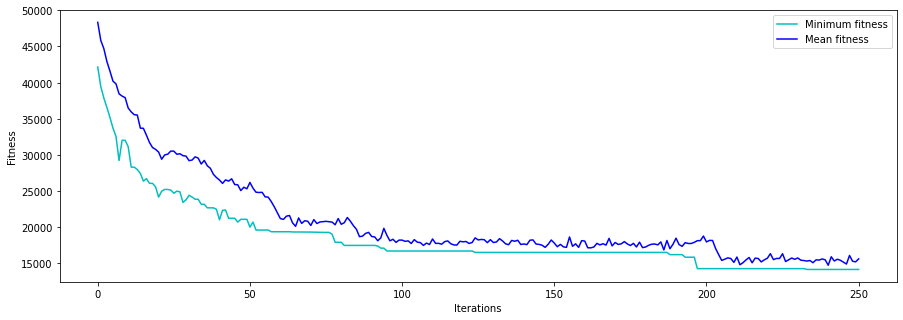

In [ ]:
plt.figure(figsize=(15, 5))
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-')
plt.legend(plots, ('Minimum fitness', 'Mean fitness'), frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Iterations');

⏳ Sim! Encontramos uma solução boa em menos de 7 minutos! 

## A rota

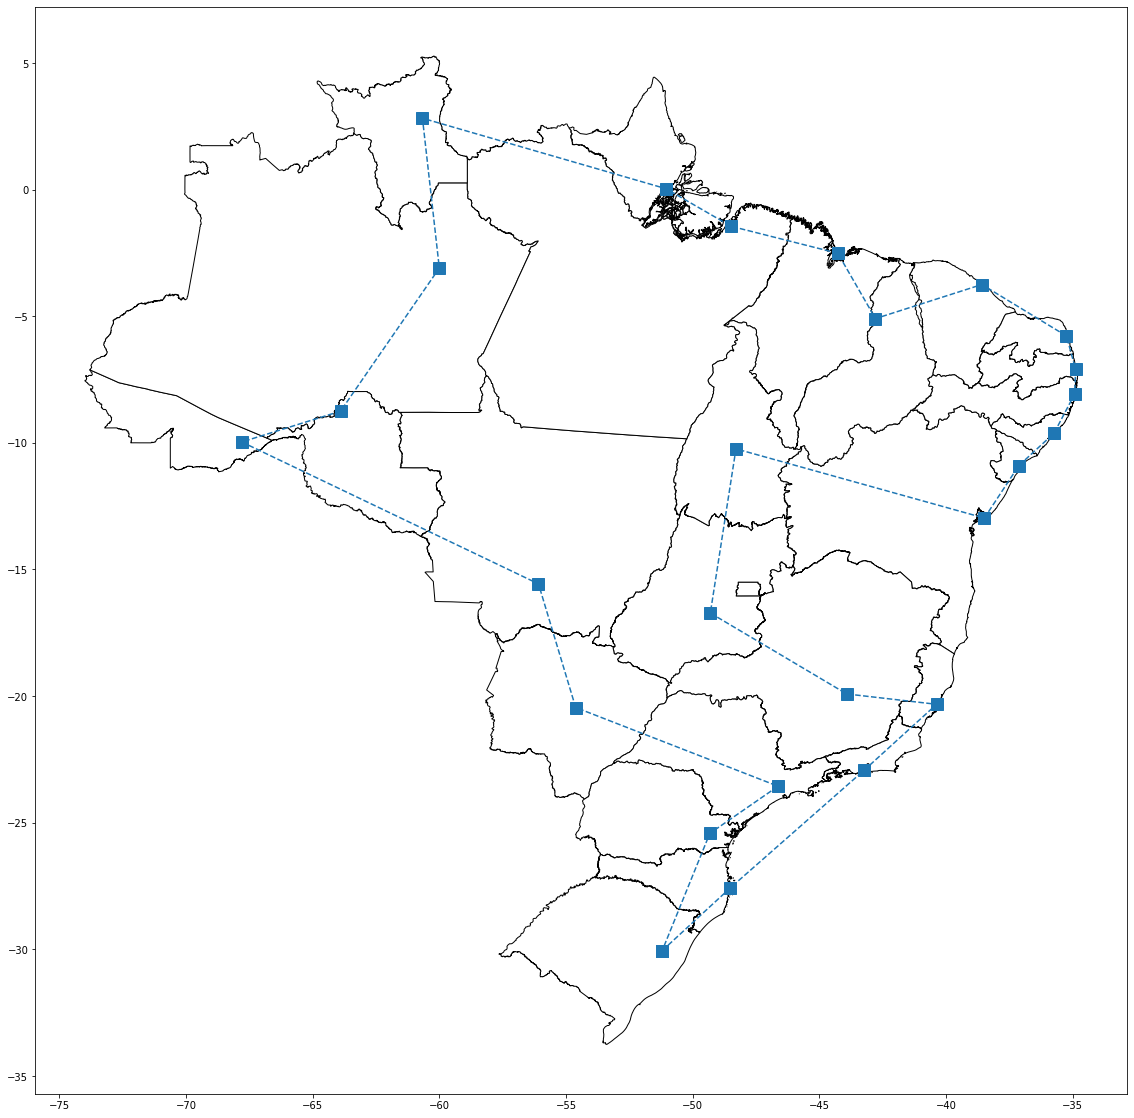

In [ ]:
br = gpd.read_file('Brasil.shp')

fig, ax = plt.subplots(figsize=(20,20))
br.plot(ax=ax,  color='white', edgecolor='black')

round = [*best_individual, best_individual[0]]
ax.plot(coords.loc[round, 'lng'].to_list(), coords.loc[round, 'lat'].to_list(), '--s', markersize=12)
plt.show()

In [ ]:
for i in range(len(best_individual)):
    print(coords.loc[best_individual[i-1], 'estado'],' >> ', coords.loc[best_individual[i], 'estado'])

Paraná  >>  Rio Grande do Sul
Rio Grande do Sul  >>  Santa Catarina
Santa Catarina  >>  Rio de Janeiro
Rio de Janeiro  >>  Espírito Santo
Espírito Santo  >>  Minas Gerais
Minas Gerais  >>  Goiás
Goiás  >>  Tocantins
Tocantins  >>  Bahia
Bahia  >>  Sergipe
Sergipe  >>  Alagoas
Alagoas  >>  Pernambuco
Pernambuco  >>  Paraíba
Paraíba  >>  Rio Grande do Norte
Rio Grande do Norte  >>  Ceará
Ceará  >>  Piauí
Piauí  >>  Maranhão
Maranhão  >>  Pará
Pará  >>  Amapá
Amapá  >>  Roraima
Roraima  >>  Amazonas
Amazonas  >>  Rondônia
Rondônia  >>  Acre
Acre  >>  Mato Grosso
Mato Grosso  >>  Mato Grosso do Sul
Mato Grosso do Sul  >>  São Paulo
São Paulo  >>  Paraná


## **E agora ? ** 

* Utilizar distâncias de rotas reais entre as cidades. Deve existir uma API do Google (paga?) ou qualquer outra *free*
* A partir da solução encontrada, adicionar uma etapa de otimização simplex para garantir a chegada ao ótimo global.